## here I just analysed the raw lhe files

In [1]:
import ROOT
import awkward as ak
import hist
import numpy as np
import math
import pylhe
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/00


Number of events: 100000
100000


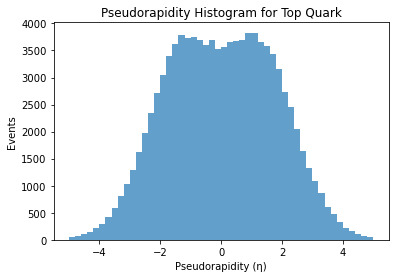

In [2]:

def calculate_pseudorapidity(px, py, pz):
    p = math.sqrt(px**2 + py**2 + pz**2)
    eta = 0.5 * np.log((abs(p) + pz) / (abs(p) - pz))
    return eta


lhe_file_path = 'pp_ttxbbx_NLO_MG5_PY8.lhe'


# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Create an empty list to store the pseudorapidity values
eta_values = []



# Open the LHE file
with open(lhe_file_path, "r") as file:
    lhe_data = file.read()

# Count the number of events
event_count = lhe_data.count("<event>")

# Print the result
print("Number of events:", event_count)


# Iterate over the events
i = 0
for event in events:
    # Iterate over the particles in the event
    for particle in event.particles:
        # Check if the particle is a top quark (particle ID = 6)
        if particle.id == 6:
            i += 1
            # Extract the relevant particle properties
            px = particle.px
            py = particle.py
            pz = particle.pz
            
            # Calculate pseudorapidity
            eta = calculate_pseudorapidity(px, py, pz)
            
            # Append the pseudorapidity value to the list
            if eta is not None:
                eta_values.append(eta)

# Create a histogram
plt.hist(eta_values, bins=50, range=(-5, 5), alpha=0.7)

# Set the labels and title
plt.xlabel('Pseudorapidity (η)')
plt.ylabel('Events')
plt.title('Pseudorapidity Histogram for Top Quark')
print(len(eta_values))
# Display the histogram
plt.show()

Number of events: 178128
178128


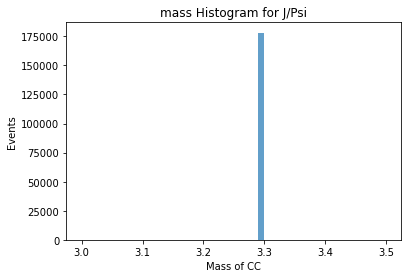

In [4]:
lhe_file_path = "gg_ccx3s18ttbar_HO.lhe"


# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Create an empty list to store the pseudorapidity values
eta_values = []

M = []

# Open the LHE file
with open(lhe_file_path, "r") as file:
    lhe_data = file.read()

# Count the number of events
event_count = lhe_data.count("<event>")

# Print the result
print("Number of events:", event_count)


# Iterate over the events
i = 0
for event in events:
    # Iterate over the particles in the event
    for particle in event.particles:
        # Check if the particle is a top quark (particle ID = 6)
        if particle.id == 9940003: # the pd id for cc 
            i += 1
            # Extract the relevant particle properties
            px = particle.px
            py = particle.py
            pz = particle.pz
            m = particle.m
            M.append(m)
            # Calculate pseudorapidity
            eta = calculate_pseudorapidity(px, py, pz)
            
            # Append the pseudorapidity value to the list
            if eta is not None:
                eta_values.append(eta)

# Create a histogram
# plt.hist(eta_values, bins=50, range=(-5, 5), alpha=0.7)
plt.hist(M, bins=50, range=(3, 3.5), alpha=0.7)

# Set the labels and title
plt.xlabel('Mass of CC')
plt.ylabel('Events')
plt.title('mass Histogram for J/Psi')
print(len(eta_values))
# Display the histogram
plt.show()

178128


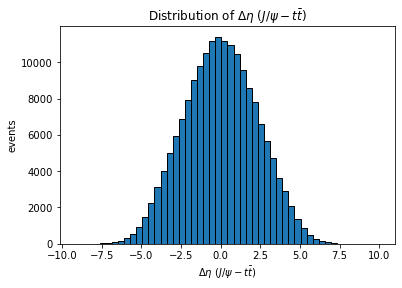

In [5]:
events = pylhe.read_lhe("gg_ccx3s18ttbar_HO.lhe")

# Step 2: Extract relevant data
etas_jpsi = []
etas_ttbar = []

for event in events:
    for particle in event.particles:
        if particle.id == 9940003:  # J/psi PDG ID is 9940003
            p = np.array([particle.px, particle.py, particle.pz])
            p_mag = np.linalg.norm(p)
            cos_theta = p[2] / p_mag  # Cosine of theta
            eta = -0.5 * np.log((1 - cos_theta) / (1 + cos_theta))  # Calculate eta
            etas_jpsi.append(eta)
        elif particle.id == 6 or particle.id == -6:  # Top quark PDG ID is 6 or -6
            p = np.array([particle.px, particle.py, particle.pz])
            p_mag = np.linalg.norm(p)
            cos_theta = p[2] / p_mag  # Cosine of theta
            eta = -0.5 * np.log((1 - cos_theta) / (1 + cos_theta))  # Calculate eta
            etas_ttbar.append(eta)

# Step 3: Calculate the eta difference
delta_etas = [eta_jpsi - eta_ttbar for eta_jpsi, eta_ttbar in zip(etas_jpsi, etas_ttbar)]
print(len(delta_etas))
# Step 4: Plot the distribution
plt.hist(delta_etas, bins=50, edgecolor='black')
plt.xlabel(r'$\Delta \eta$ ($J/\psi - t\bar{t}$)')
plt.ylabel('events')
plt.title(r'Distribution of $\Delta \eta$ ($J/\psi - t\bar{t}$)')
plt.show()

## plots for $J/\Psi$ particle

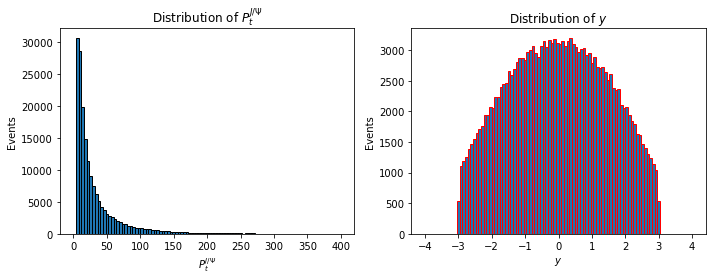

In [8]:
def calculate_pt(px, py):
    p = np.array([px, py])
    pt = np.linalg.norm(p)
    return pt

def calculate_rapidity(e, pz):
    y = 0.5 * np.log((e + pz) / (e - pz))
    return y

def calculate_pseudorapidity(px, py, pz):
    p = math.sqrt(px**2 + py**2 + pz**2)
    eta = 0.5 * np.log((abs(p) + pz) / (abs(p) - pz))
    return eta



Pt = []
Y = []

events = pylhe.read_lhe("gg_ccx3s18ttbar_HO.lhe")

for event in events:
    for particle in event.particles:
        if particle.id == 9940003:  # J/psi PDG ID is 9940003
            px = particle.px
            py = particle.py
            pz = particle.pz
            e = particle.e
            pt = calculate_pt(px, py)
            y = calculate_rapidity(e, pz)
            Y.append(y)
            Pt.append(pt)

            

            
# Plotting two histograms side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of Pt
ax1.hist(Pt, bins=100, range=(0, 400), edgecolor='black')
ax1.set_xlabel(r'$P_t^{ J/\Psi}$')
ax1.set_ylabel('Events')
ax1.set_title(r'Distribution of $P_t^{J/\Psi}$')

# Histogram of rapidity
ax2.hist(Y, bins=100 , range= (-4,4), edgecolor='red')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel('Events')
ax2.set_title(r'Distribution of $y$')

plt.tight_layout()
plt.show()

In [9]:
print(max(Y))

2.999914300313093


## Apply some cuts: $P_t^{\Psi} > 6GeV$ and $|y| < 2.4$

Number of events: 178128
148462
178128
Ratio of the acceptance $J/Psi$ = 0.8334568400251504


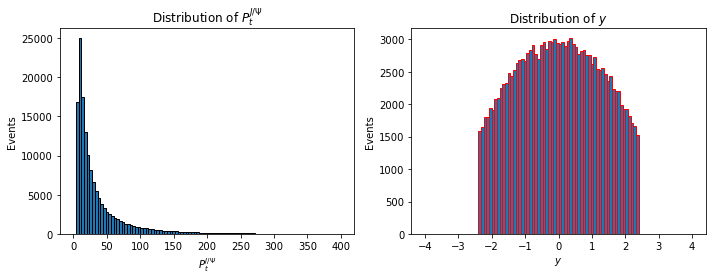

In [10]:
lhe_file_path = "gg_ccx3s18ttbar_HO.lhe"

events = pylhe.read_lhe(lhe_file_path)

Pt = []
Y = []
with open(lhe_file_path, "r") as file:
    lhe_data = file.read()

# Count the number of events
event_count = lhe_data.count("<event>")
# Print the result
print("Number of events:", event_count)

J_counter2 = 0
for event in events:
    for particle in event.particles:
        if particle.id == 9940003:  # J/psi PDG ID is 9940003
            J_counter2+=1
            px = particle.px
            py = particle.py
            pz = particle.pz
            e = particle.e
            pt = calculate_pt(px, py)
            y = calculate_rapidity(e, pz)
            if pt > 6 and abs(y)<2.4:
                Pt.append(pt)
                Y.append(y)
print(len(Pt))
print(J_counter2)
ratio = (len(Pt)/J_counter2)
print(r'Ratio of the acceptance $J/Psi$ = {0}'.format(ratio))

# Plotting two histograms side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of Pt
ax1.hist(Pt, bins=100, range=(0, 400), edgecolor='black')
ax1.set_xlabel(r'$P_t^{ J/\Psi}$')
ax1.set_ylabel('Events')
ax1.set_title(r'Distribution of $P_t^{J/\Psi}$')

# Histogram of rapidity
ax2.hist(Y, bins=100 , range= (-4,4), edgecolor='red')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel('Events')
ax2.set_title(r'Distribution of $y$')

plt.tight_layout()
plt.show()

In [11]:
print(min(Pt))
print(max(Y))

6.0000028835272845
2.399880891541007


# Apply all cuts: $P_t^{\psi} > 6GeV$ and $|y_\psi| < 2.4$ and $|y_{t\bar{t}}| < 3$

In [13]:
import numpy as np
import pylhe

def calculate_pt(px, py):
    p = np.array([px, py])
    pt = np.linalg.norm(p)
    return pt

def calculate_rapidity(e, pz):
    y = 0.5 * np.log((e + pz) / (e - pz))
    return y

lhe_file_path = "gg_ccx3s18ttbar_HO.lhe"
events = pylhe.read_lhe(lhe_file_path)


# Count the number of events
event_count = lhe_data.count("<event>")
# Print the result
print("Number of events:", event_count)

i = 0
for event in events:
    for particle in event.particles:
        if particle.id == 6:  # t PDG ID is 6
            px_t = particle.px
            py_t = particle.py
            pz_t = particle.pz
            e_t = particle.e
            y_t = calculate_rapidity(e_t, pz_t)
        elif particle.id == -6:  # tbar PDG ID is -6
            px_tbar = particle.px
            py_tbar = particle.py
            pz_tbar = particle.pz
            e_tbar = particle.e
            y_tbar = calculate_rapidity(e_tbar, pz_tbar)
        elif particle.id == 9940003:  # J/psi PDG ID is 9940003
            px_psi = particle.px
            py_psi = particle.py
            pz_psi = particle.pz
            e_psi = particle.e
            pt_psi = calculate_pt(px_psi, py_psi)
            y_psi = calculate_rapidity(e_psi, pz_psi)
    Y_ttbar = y_t - y_tbar

    if abs(Y_ttbar) < 3 and abs(y_psi) < 2.4 and pt_psi > 6:
        i += 1

print('number of passed Events: {0}'.format(i))
print('ratio of acceptance: {0}'.format(i/event_count))

Number of events: 178128
number of passed Events: 147170
ratio of acceptance: 0.8262036288511632
